In [32]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import seaborn as sn
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
htm_doc="""<table class="data table table-hover table-striped new-york-city"><thead><tr><th class="col-md-3">Country/City</th><th class="col-md-3">File Name</th><th data-field="count" class="col-md-3" data-align="right">Description</th></tr></thead><tbody><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/listings.csv.gz">listings.csv.gz</a></td><td>Detailed Listings data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz">calendar.csv.gz</a></td><td>Detailed Calendar Data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/reviews.csv.gz">reviews.csv.gz</a></td><td>Detailed Review Data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/listings.csv">listings.csv</a></td><td>Summary information and metrics for listings in <!-- -->New York City<!-- --> (good for visualisations).</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/reviews.csv"> reviews.csv</a></td><td>Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/neighbourhoods.csv">neighbourhoods.csv</a></td><td>Neighbourhood list for geo filter. Sourced from city or open source GIS files.</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/neighbourhoods.geojson">neighbourhoods.geojson</a></td><td>GeoJSON file of neighbourhoods of the city.</td></tr></tbody></tabl"""

In [8]:
soup = (htm_doc, 'html.parser')

In [9]:
soup = BeautifulSoup(htm_doc, 'html.parser')

In [10]:
soup

<table class="data table table-hover table-striped new-york-city"><thead><tr><th class="col-md-3">Country/City</th><th class="col-md-3">File Name</th><th class="col-md-3" data-align="right" data-field="count">Description</th></tr></thead><tbody><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/listings.csv.gz">listings.csv.gz</a></td><td>Detailed Listings data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz">calendar.csv.gz</a></td><td>Detailed Calendar Data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/reviews.csv.gz">reviews.csv.gz</a></td><td>Detailed Review Data</td></tr><tr><td>New York City</td><td><a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/listings.csv">listings.csv</a></td><td>Summary information

In [11]:
print(soup.prettify())

<table class="data table table-hover table-striped new-york-city">
 <thead>
  <tr>
   <th class="col-md-3">
    Country/City
   </th>
   <th class="col-md-3">
    File Name
   </th>
   <th class="col-md-3" data-align="right" data-field="count">
    Description
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    New York City
   </td>
   <td>
    <a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/listings.csv.gz">
     listings.csv.gz
    </a>
   </td>
   <td>
    Detailed Listings data
   </td>
  </tr>
  <tr>
   <td>
    New York City
   </td>
   <td>
    <a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/calendar.csv.gz">
     calendar.csv.gz
    </a>
   </td>
   <td>
    Detailed Calendar Data
   </td>
  </tr>
  <tr>
   <td>
    New York City
   </td>
   <td>
    <a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/data/reviews.csv.gz">
     reviews.csv.gz
    </a>
   </td>
   <td>
    D

In [12]:
url="http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/listings.csv"

In [13]:
df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/listings.csv")

C:\Users\IFDCPP-2\AppData\Local\Temp\ipykernel_31988\2164636260.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-03-06/visualisations/listings.csv")


In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [16]:
df.shape

(42931, 18)

In [ ]:
file_path = os.path.join('c:', 'Users','IFDCPP-2','Documents','Felix Omokaro', 'new_york_new.csv')
df.to_csv(file_path, index=False)

In [17]:
df['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [18]:
df['neighbourhood_group'].value_counts()

Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: neighbourhood_group, dtype: int64

In [25]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
C:\Users\IFDCPP-2\PycharmProjects\Predicting-Airbnb-rental-price-New-York

In [27]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

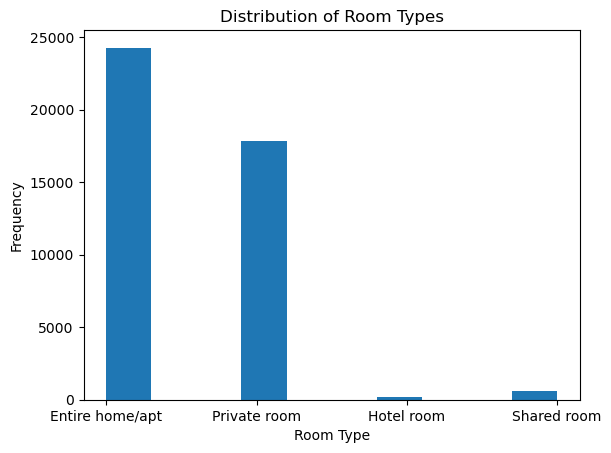

In [46]:
plt.hist(df['room_type'])

# add labels and title
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Distribution of Room Types')

# display the plot
plt.show()

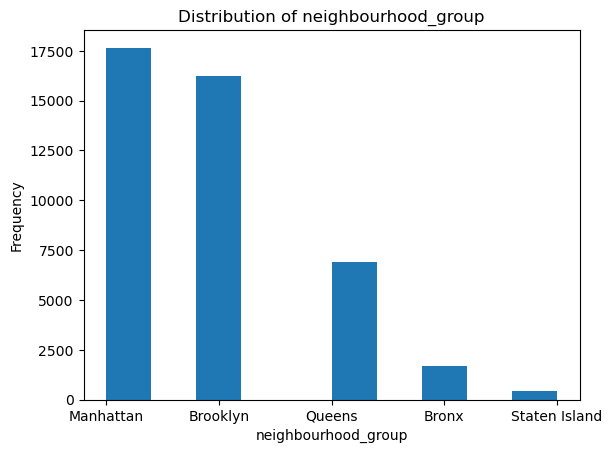

In [49]:
plt.hist(df['neighbourhood_group'])

# add labels and title
plt.xlabel('neighbourhood_group')
plt.ylabel('Frequency')
plt.title('Distribution of neighbourhood_group')

# display the plot
plt.show()

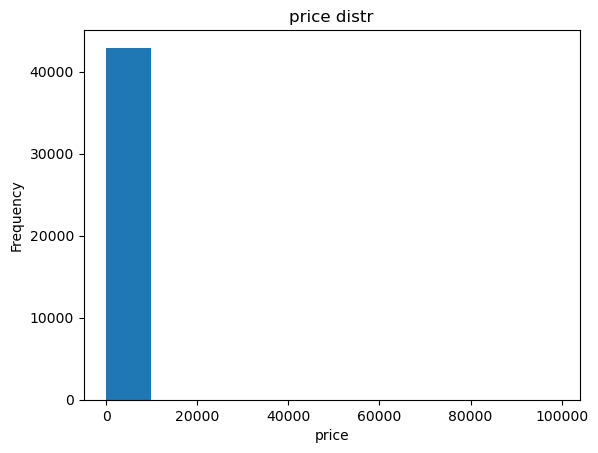

In [50]:
plt.hist(df['price'])

# add labels and title
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('price distr')

# display the plot
plt.show()